In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5) 
import missingno as msno # 결측치 파악 패키지

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\nabi4\AppData\Local\Temp\ipykernel_14856\3836365712.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


캐글 API 사용법

https://velog.io/@skyepodium/Kaggle-API-%EC%82%AC%EC%9A%A9%EB%B2%95

# 타이타닉 데이터

타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성해보자.

아래 링크를 참고해서 실습했다.
- 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning
https://kaggle-kr.tistory.com/17?category=868316

- EDA To Prediction
https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook

## EDA

In [4]:
# 데이터 읽기

df_train = pd.read_csv('../data/1. titanic/train.csv')
df_test = pd.read_csv('../data/1. titanic/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 각 feature들이 가진 통계치 확인

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 결측치 확인

In [8]:
# 결측치 확인

## train
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
## test
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data가 존재하는 것을 확인했다.

결측치는 mano 라이브러리를 통해 쉽게 확인할 수 있다.
https://github.com/ResidentMario/missingno

<Axes: >

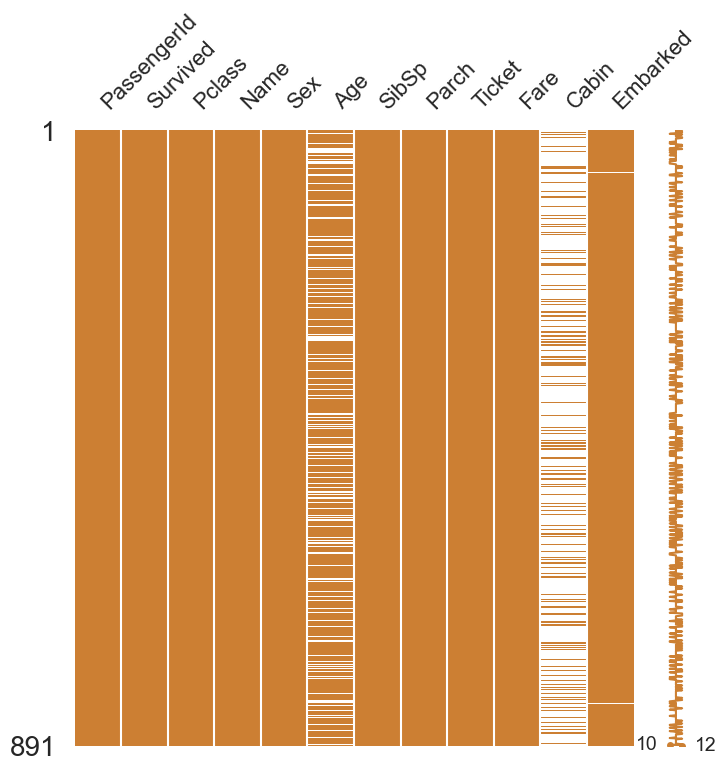

In [11]:
# msno.matrix(df = 데이터프레임, figsize = , color = )
# 결측치를 보고자 하는 데이터프레임과 원하는 색상값을 넣어주면
# 결측치가 있는 곳이 비어져 출력된다.

msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

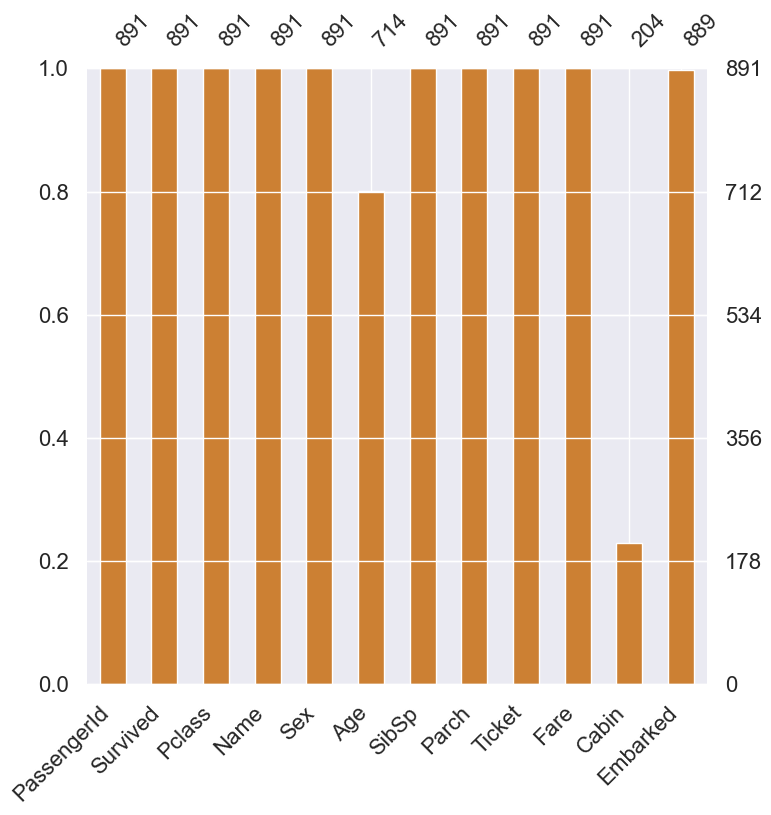

In [12]:
# bar는 컬럼별 결측치의 누적값을 볼 수 있다.

msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 타겟 데이터 확인

타겟 데이터가 어떤 분포를 가지고 있는지 확인해야한다.

지금과 같은 이진 분류 문제의 경우, 1과 0의 분포에 따라 모델의 평가방법이 달라질 수 있다.

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


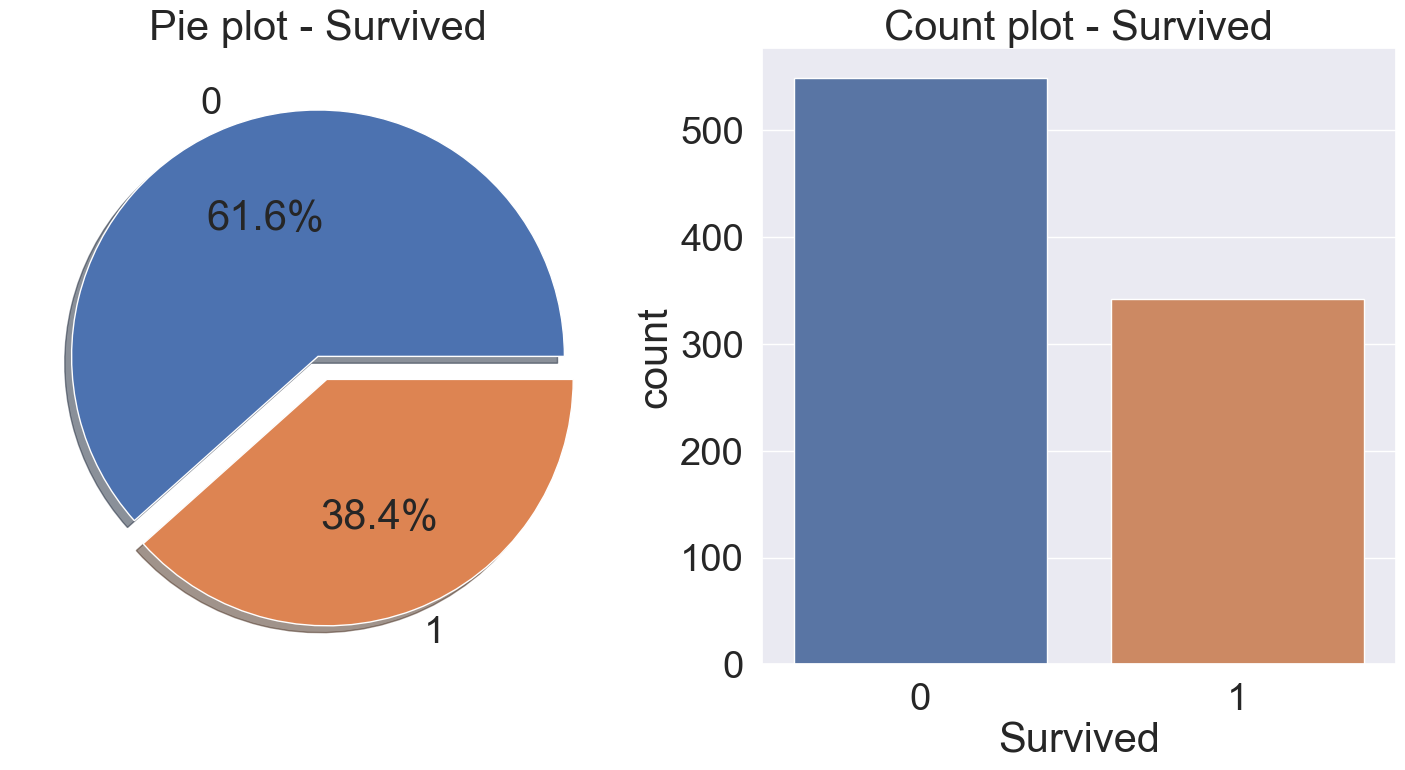

In [19]:
# 타겟 데이터 : Survived

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# pie chart
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
# countplot
sns.countplot(x = df_train['Survived'], ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

61.6%의 사람들이 살아남지 못했다.

타겟 데이터의 분포를 보는 경우는 데이터의 불균형이 있는지 확인하기 위함이었다.

이때 데이터의 불균형이란, 100개의 데이터 중에서 타겟 데이터가 99 vs 1과 같이 어느 한 쪽의 결과에 쏠려있는 것을 말한다. 이런 데이터의 경우 아무리 잘 모델을 만든다해도 그 성능은 좋지 않게 된다. 

따라서 데이터 불균형이 있는 경우 어떠한 조치를 취해주어야하는데 해당 데이터에는 그렇지 않으니 그냥 진행하도록 하겠다.

### pclass

In [22]:
# pclass vs survived

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pclass에 따른 생존률의 차이를 보고자 한다. 위 두 코드 중 맞는 것은 무엇일까?

바로 아래 sum() 이다.

count()는 각 class에 몇 명이 있는지 개수를 세주는 함수이지만, 'Survived' 컬럼이 0과 1로 이루어져있기 때문에 sum()을 하게 되면 생존한 사람들의 수를 구해주게 되기 때문이다.

헷갈린다면 croostab을 통해 정확히 이해할 수 있다.

In [24]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


마찬가지로 'Survived' 컬럼이 0과 1로 이루어져있기 때문에 우리는 평균을 구하면 생존율을 얻을 수 있다.

In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

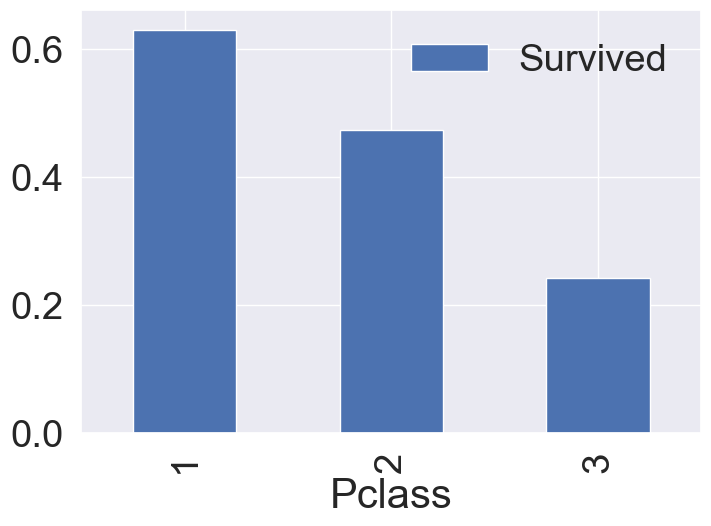

In [26]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

1등실 승객들의 생존율이 가장 높아보인다.

위와 같이 groupby를 통해 구한 생존율을 통해 그래프를 그릴 수도 있지만 우리에겐 seaborn 의 countplot도 있다.

In [36]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

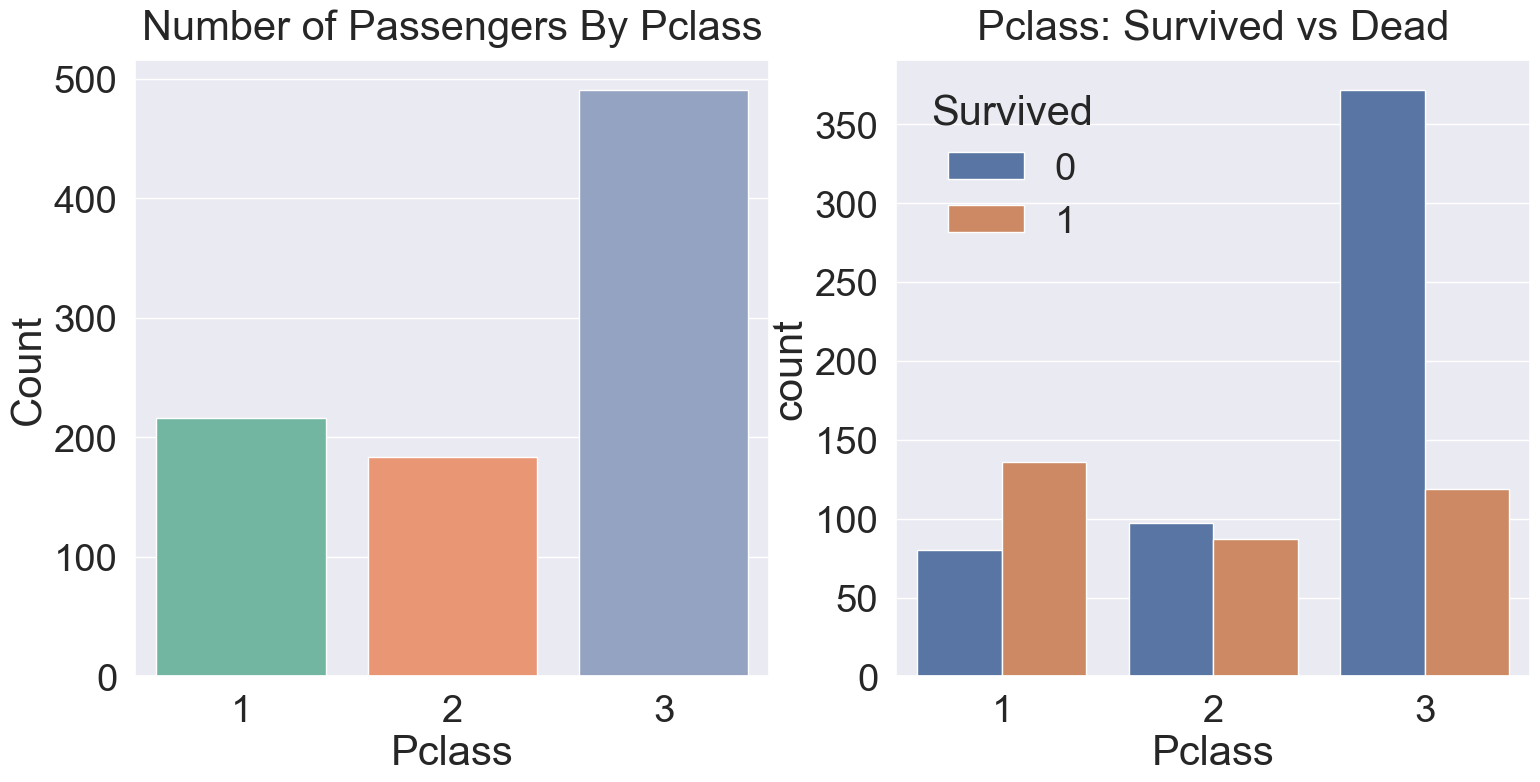

In [35]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫번째 차트 : 객실별 승객수
sns.countplot(x = 'Pclass', data=df_train, palette='Set2', ax=ax[0])
#df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

# 두번째 차트 : 객실별 생존 여부
sns.countplot(x = 'Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

countplot()과 value_counts()후 bar chart를 그리는 것은 똑같이 객실별 승객수를 나타내주지만 차이점이 있다.

countplot은 각 클래스별 순서대로 1,2,3 객실을 보여주지만 value_counts()는 계산될 때 내림차순으로 정렬되므로 승객수가 많은 3, 2, 1순으로 차트를 보여준다.

원하는 목적에 따라 시각화를 하면 되고!

두 차트에서 확인할 수 있는 인사이트는 아래와 같다.

1. 클래스가 높을수록 생존확률이 높다.
2. 생존 여부에 'Pclass' 필드의 영향이 클 것으로 보이므로 모델을 세울 때 해당 필드를 사용하는 것이 좋아보인다.

### sex

성별에 따른 생존여부는 어떻게 달라질까?

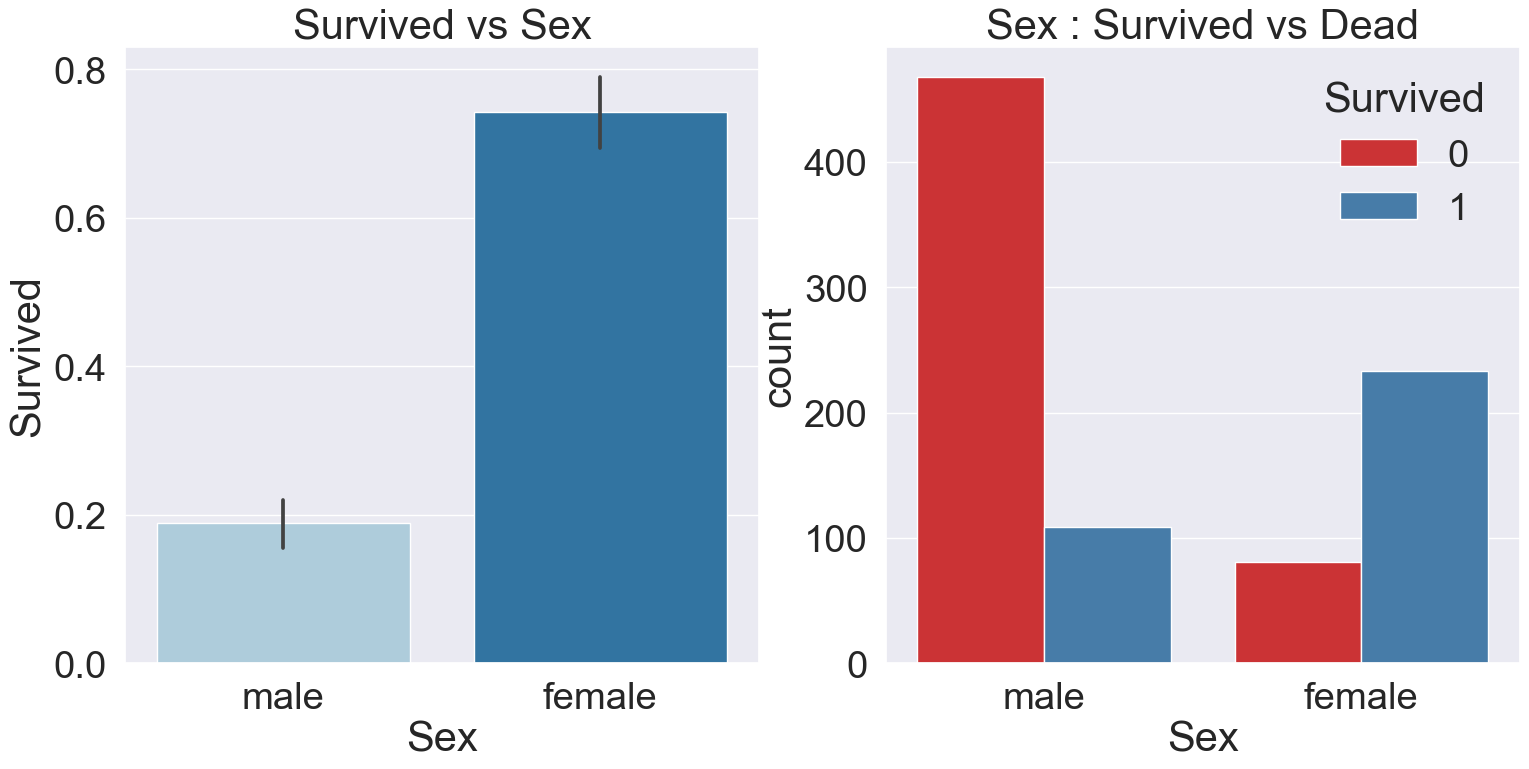

In [50]:
f, ax = plt.subplots(1,2, figsize = (18,8))

#첫번째 차트 : 
sns.barplot(x = 'Sex', y = 'Survived', data = df_train, ax = ax[0], palette='Paired')
#df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

#두번째 차트 : 성별에 따른 생존여부
sns.countplot(x = 'Sex', data = df_train, hue = 'Survived', palette='Set1', ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

두 차트의 순서를 맞추고 싶어 groupby 대신 barplot을 사용해 그려주었다.

차트에서 보이는 것과 같이 여성의 생존 확률이 남성보다 높다.

In [48]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [51]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


'Sex' 필드 또한 'Pclass' 필드와 마찬가지로 모델 생성에 중요한 feature가 될 것 같다.

그렇다면 두 필드를 한 번에 살펴보면 어떤 관계가 있을까?

-> factorplot 공식문서
https://www.geeksforgeeks.org/python-seaborn-factorplot-method/

factorplot은 계속 오류가 나서 확인해보니, catplot()으로 이름이 변경된 듯 했다.(https://seaborn.pydata.org/archive/0.11/whatsnew.html#:~:text=The%20factorplot%20function%20has%20been%20renamed%20to%20catplot())


-> catplot 공식문서
https://seaborn.pydata.org/archive/0.11/generated/seaborn.catplot.html#seaborn.catplot

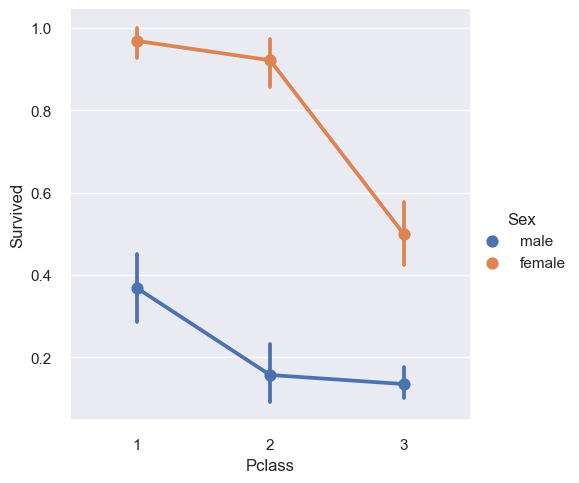

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x = 'Pclass', y ='Survived', hue='Sex', data=df_train, 
            kind = 'point')

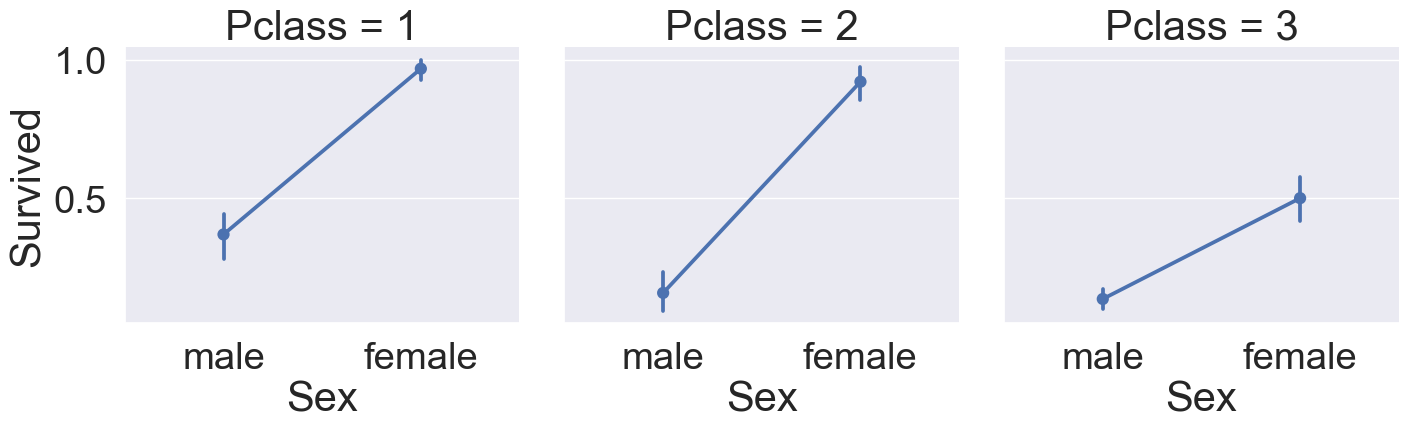

In [70]:
sns.catplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, kind = 'point')

여러 차원의 필드를 한 번에 볼 때 유용하다.

한 차트에 볼수도 있고 col 옵션을 두어 여러 차트에 걸쳐서 확인할 수도 있다.

역시 모든 클래스에서 여성이 살 확률이 남성보다 높고 성별과 관련없이 클래스가 높을 수록 살 확률이 높은 것을 확인할 수 있다.

### Age

In [72]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


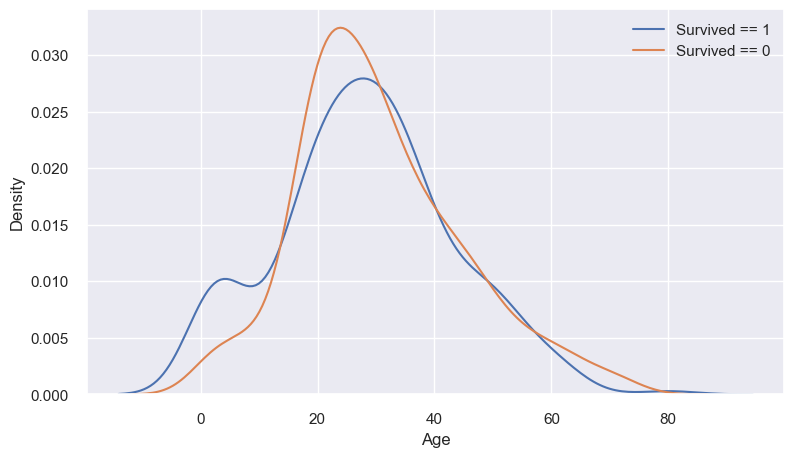

In [73]:
# 커널밀도추정 그래프
# 데이터 분포를 부드럽게 표시하고 연속 확률 분포를 추정하는데 도움을 준다.
# 데이터가 어떻게 분포되어있는지 확인하는데에 주로 사용

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

전체적인 연령대는 0과 1의 분포가 비슷한데, 나이가 어린 경우 생존자가 많아보인다.

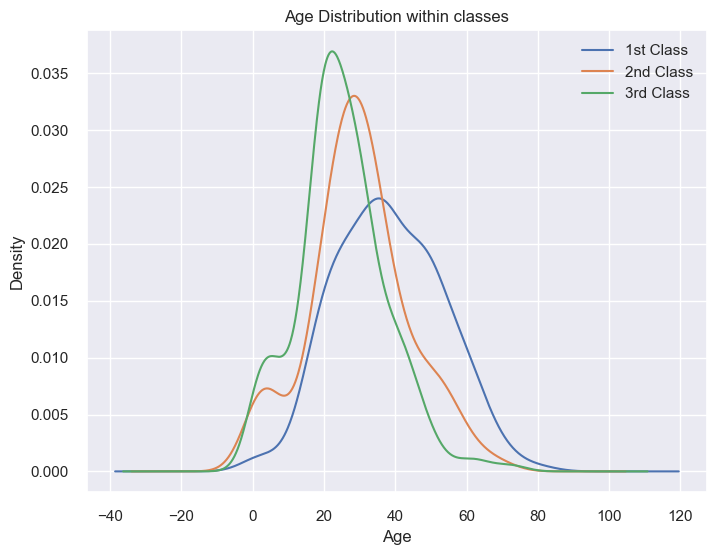

In [74]:
# pclass 별 Age 분포
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

클래스가 높을수록 연령대가 높아지는 것 같다.

나이에 따른 생존률이 어떻게 되는지 좀 더 살펴보고자 나이 범위를 넓혀가며 시각화해보았다.

In [75]:
for i in range(1, 10):
    # 생존율
    # 생존자의 수 : df_train[df_train['Age'] < i]['Survived'].sum()
    # 해당 연령대의 승객 수 : len(df_train[df_train['Age'] < i]['Survived'])
    data = df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])
    print(data)

1.0
0.8571428571428571
0.625
0.6666666666666666
0.675
0.7045454545454546
0.7021276595744681
0.68
0.6666666666666666


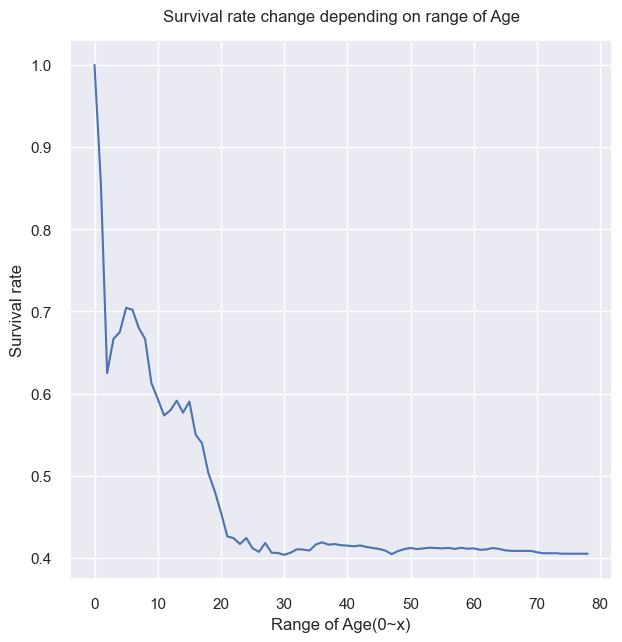

In [76]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

연령별 생존율을 시각화한 그래프이다.

나이가 어릴수록 확실히 생존율이 높은 것을 확인할 수 있다.

### pclass, sex, age

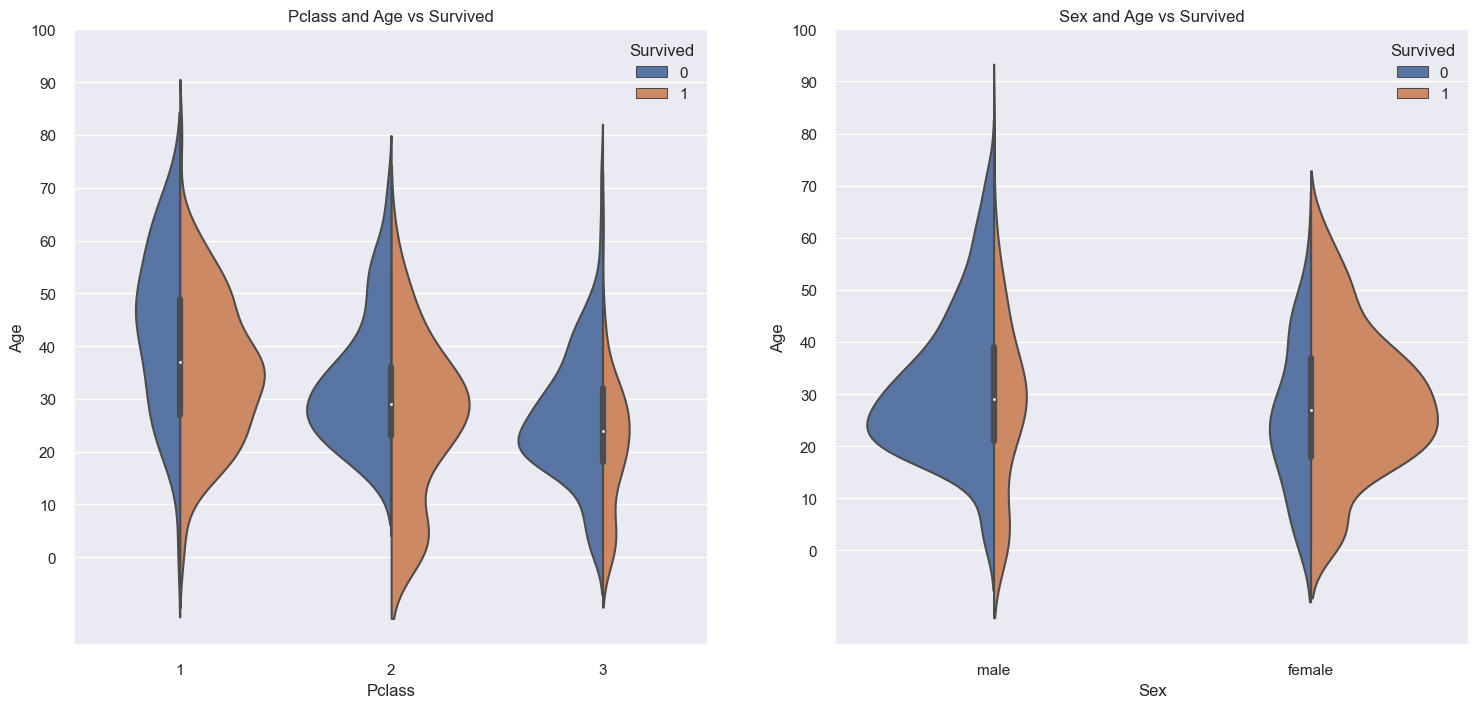

In [78]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 차트 : pclass에 따른 연령별 생존율
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

# 두번쨰 차트 : sex에 따른 연령별 생존율
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

x축은 보고자하는 pclass와 sex 컬럼을, y축은 age를 두고 생존율을 한 번 살펴보자.

해당 데이터의 넓이가 넓을수록 그 데이터에 속한 사람들이 많다고 해석하면 된다.

모든 클래스에서 나이가 어릴수록 생존을 많이 했고 여성이 생존을 더 많이 한 것으로 보인다.

### Embarked
탑승한 항구를 보여주는 데이터이다.

<Axes: xlabel='Embarked'>

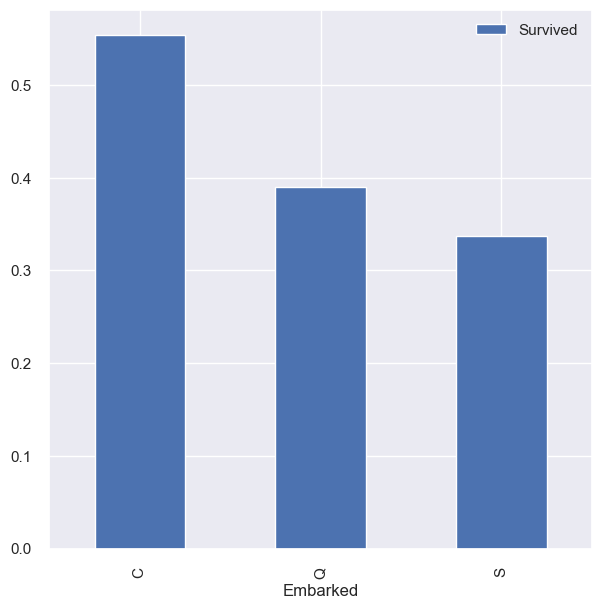

In [79]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

생존율이 크게 다르지는 않아보이지만, 그래도 C항구에서 탑승한 승객이 생존율이 제일 높다.

모델에 얼마나 큰 영향을 미칠지는 모르겠지만 일단 사용해보고 컬럼별 중요도도 확인해보도록 하자.

다른 컬럼과 함께 'Embarked' 컬럼을 같이 살펴보자.

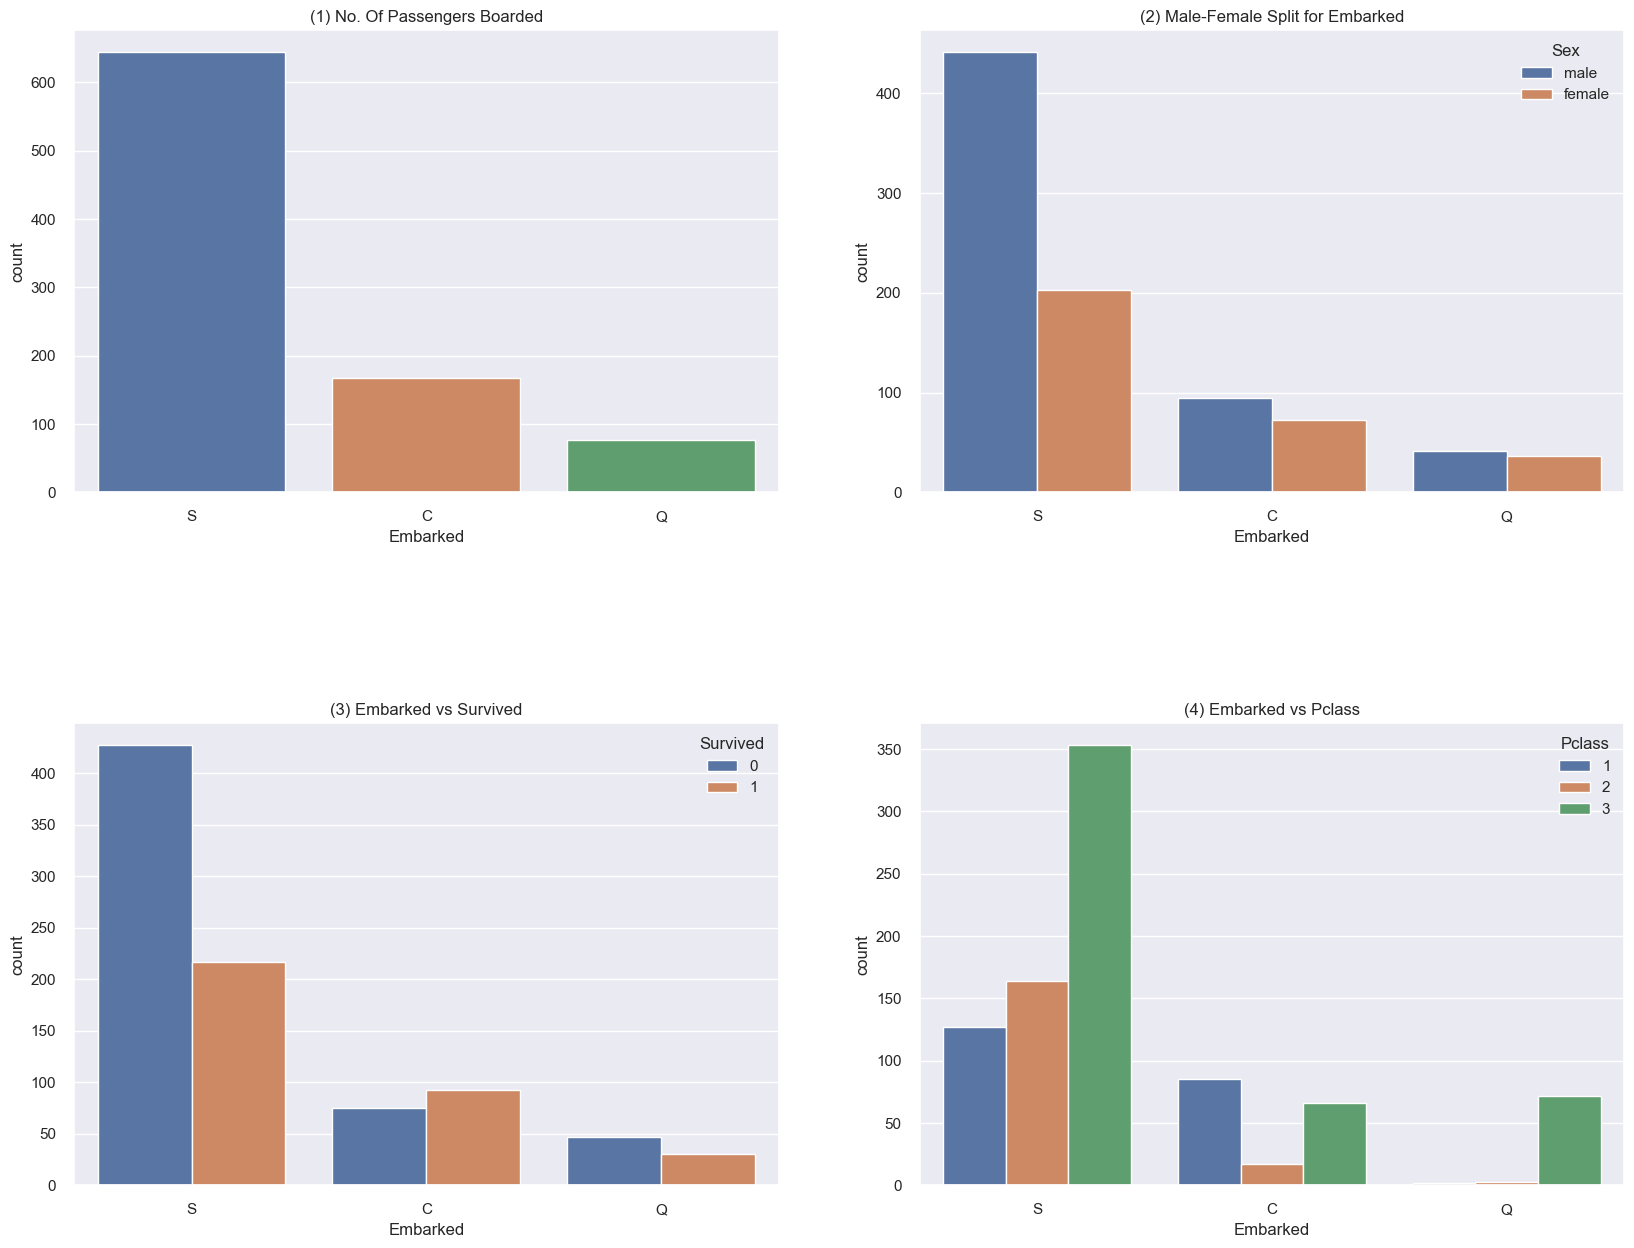

In [81]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

# 첫번째 차트 : 항구별 승객수
sns.countplot(x = 'Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

# 두번째 차트 : 항구별 탑승한 승객의 성별수
sns.countplot(x = 'Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

# 세번째 차트 : 항구별 탑승한 승객의 생존율
sns.countplot(x = 'Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

# 네번째 차트 : 항구별 탑승한 승객의 pclass수 
sns.countplot(x = 'Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했다.
- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
- Figure(3) - 생존확률이 S 경우 많이 낮다. 
- Figure(4) - C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그런 것으로 보인다. S는 3rd class 가 많아서 생존확률이 낮게 나온 것 같다.

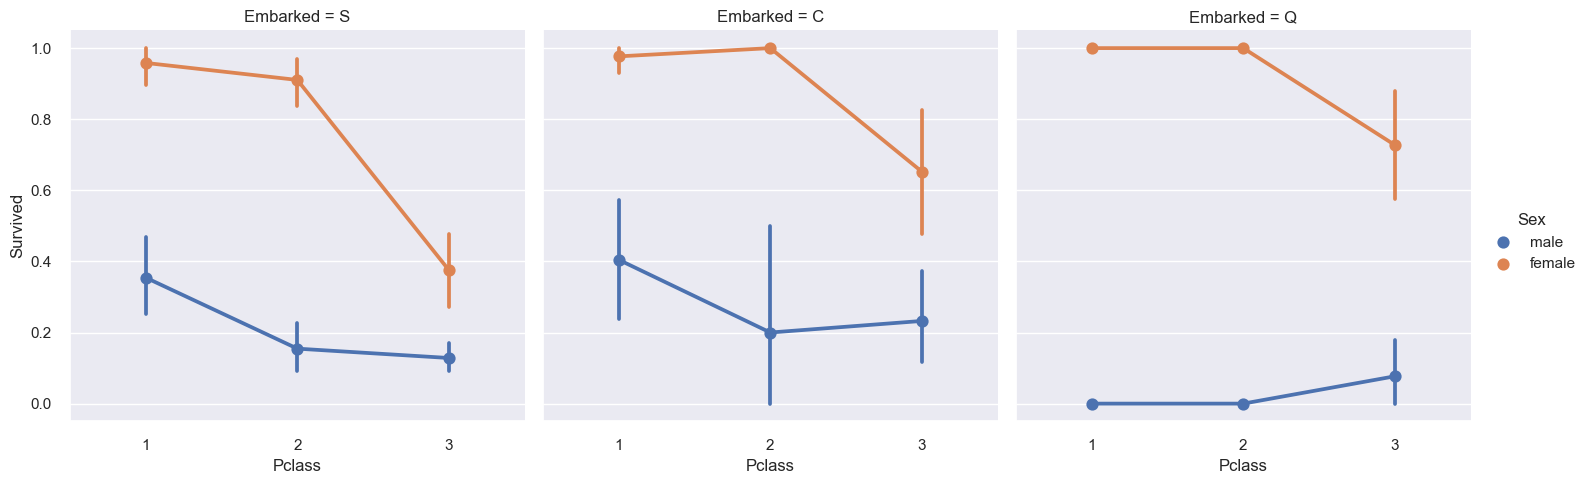

In [123]:
sns.catplot(x ='Pclass', y = "Survived", hue = 'Sex', col = 'Embarked', data = df_train, kind  = 'point')
plt.show()

1등실, 2등실 여성들에 대한 생존율은 탑승한 항구와 관계없이 거의 1에 가까워보인다.
3등실 승객들은 남성과 여성 모두 생존율은 모두 낮아보이며, 항구 Q에서 탑승한 남성들은 거의 다 살아남지 못한 것으로 보인다.

In [124]:
df_train['Embarked'].isnull().sum()

2

'Embarked' 필드의 결측치가 2개가 있다. 항구 C와 Q에서 탑승한 것보다 S에서 탑승한 승객들이 훨씬 많으므로 이 결측치는 S로 모두 채워주도록 하자.

In [125]:
df_train['Embarked'].fillna('S', inplace=True)
df_train['Embarked'].isnull().sum()

0

### Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sibsp는 형제와 자매 수, parch는 부모나 자녀수를 뜻하는 데이터이다.

우리는 여기서 가족수를 구할 수 있다. 

'FamilySize' 컬럼을 만들어 가족 수를 구해보자.

In [84]:
# 자신을 포함해야하니 1을 더함.

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [85]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


가족수와 생존 여부도 관련이 있을까?

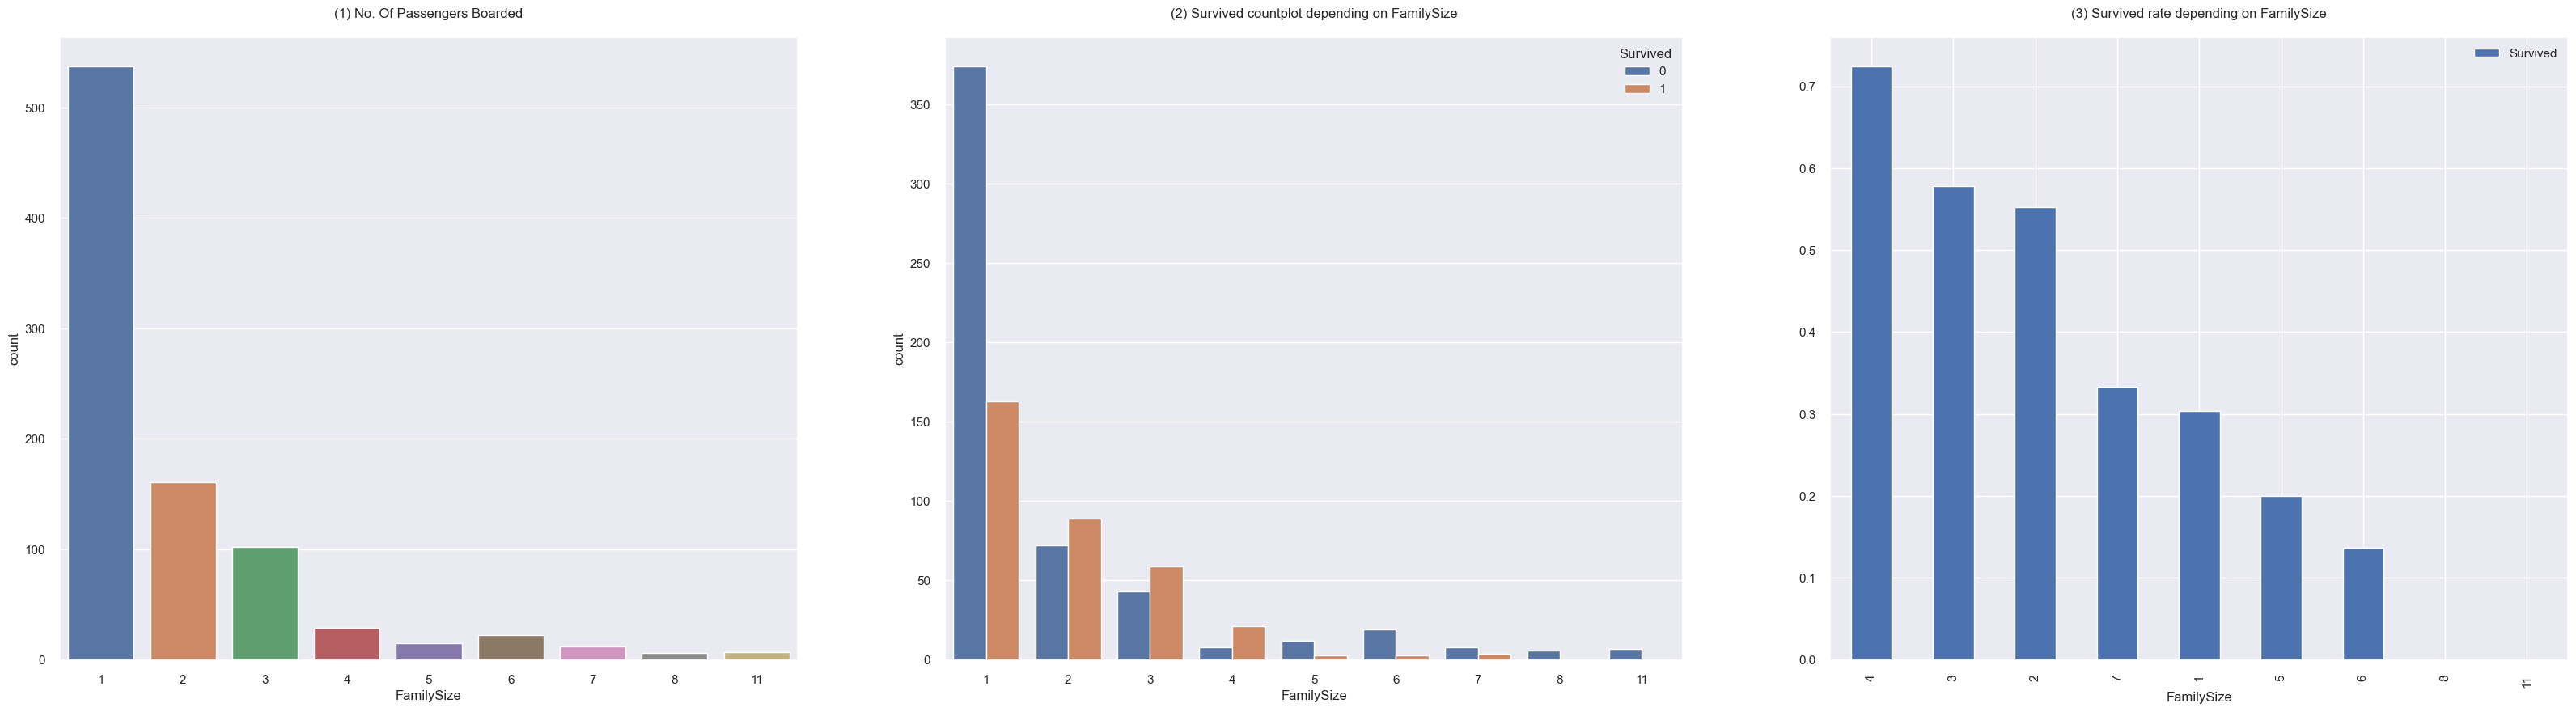

In [87]:
f,ax=plt.subplots(1, 3, figsize=(40,10))

# 첫번째 차트 : 가족수
sns.countplot(x = 'FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# 두번째 차트 : 가족수에 따른 생존여부
sns.countplot(x = 'FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

# 세번째 차트 : 가족수에 따른 생존율
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

가족수가 1명 부터 11명까지 있고 1명 > 2명 > 3명 .. 순으로 많이 탑승했다.

가족 크기에 따른 생존 여부를 보았는데 가족 수가 4명인 경우 가장 생존 확률이 높은 것을 볼 수 있다.

가족수가 많을수록 생존확률이 높아질까?

그것은 아니다. 가족수가 많은 5,6,7,8,11명의 생존율은 낮기 때문이다.

가족수가 너무 많으면 생존 확률이 적어지지만, 3-4명 선이 생존확률이 높아보인다.

### Fare 
탑승요금에 관한 컬럼이다.

In [126]:
print('Highest Fare was:',df_train['Fare'].max())
print('Lowest Fare was:',df_train['Fare'].min())
print('Average Fare was:',df_train['Fare'].mean())

Highest Fare was: 6.238967387173662
Lowest Fare was: 0.0
Average Fare was: 2.8938462379200263


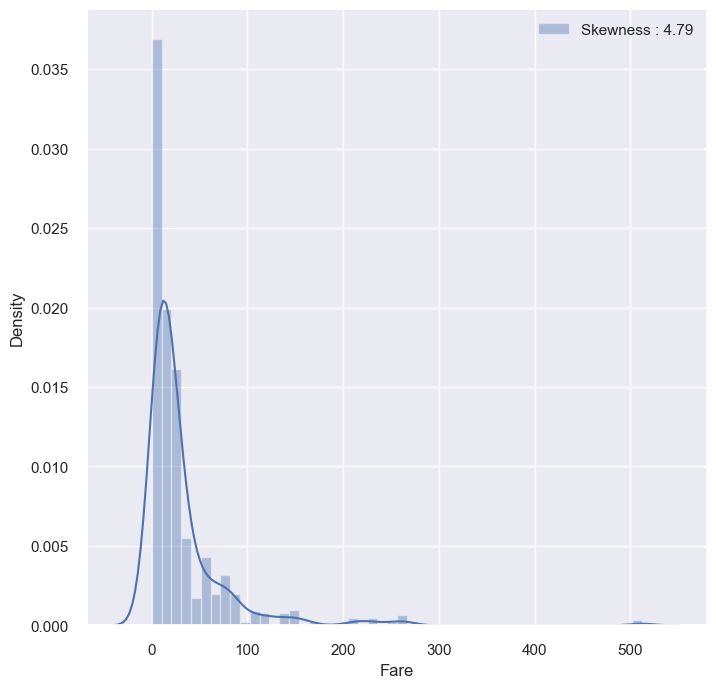

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

'Fare' 컬럼은 데이터의 분포가 큰 비대칭이다.

이대로 모델에 넣는다면 모델이 잘못 학습할 수 있으므로 조치를 취해주어야한다.

비대칭 분포를 해결하는 여러 방법이 있지만 지금은 $log$를 취해보도록 하겠다.

실은 이 작업은 'feature engineering'에 해당한다. 머신러닝 알고리즘이 작동할 수 있도록 하는 Feature들을 만드는 과정으로 해당 데이터에 대한 도메인 지식을 사용해서 변환시켜주면 된다.

In [90]:
df_train['Fare'].isnull().sum()

0

In [91]:
df_test['Fare'].isnull().sum()

1

In [92]:
# 'Fare' 컬럼의 비대칭 분포 해결

## test set 에 있는 결측치를 평균값으로 치환
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() 

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

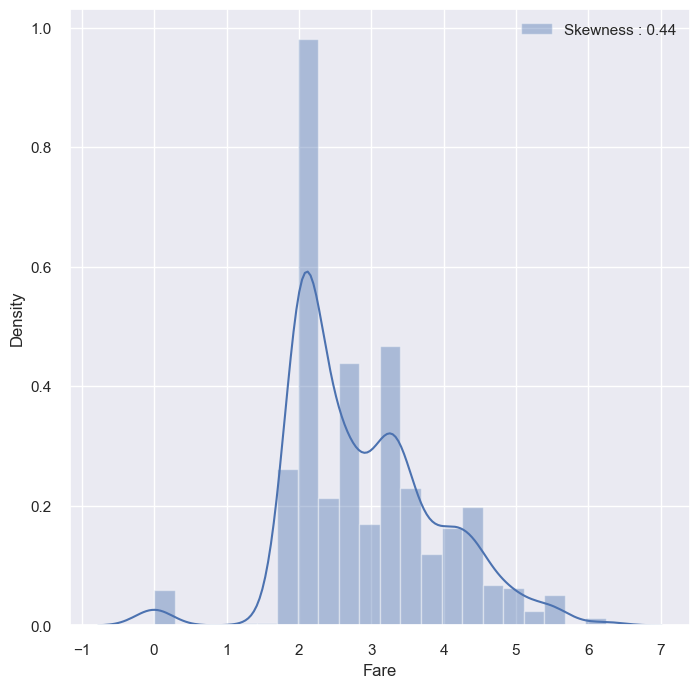

In [93]:
# 히스토그램

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

$log$를 취하니, 비대칭성이 많이 사라진 것을 볼 수 있다.

앞서 말했듯이 이 작업은 Feature Engineering에 들어가는 부분이다.

모델을 학습하고 모델의 성능을 높이기 위해 feature들에 여러 조작을 하거나 새로운 feature를 추가하는 것을 뜻한다.


### Cabin

In [94]:
df_train['Cabin'].isnull().sum() / len(df_train['Cabin'])

0.7710437710437711

결측치가 너무 많으므로 해당 컬럼은 모델에서 제외하도록 하자.

### Ticket

In [97]:
df_train['Ticket'].isnull().sum()

0

In [98]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [99]:
df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

'Ticket' 컬럼은 카테고리 데이터로 해당 컬럼을 모델에 사용하기 위해서는 어떤 작업을 해주어야한다.

어떤 특징을 이끌어내서 생존 여부와 연관시킬 수 있을까....
는 더 고민해봐야할 문제이다.


### name 필드에서 알아낼 수 있는 것

예를 들면 이런 것이다. 'name' 필드 데이터를 자세히 보면 그 안에 사회적 신분이 숨어져있다(Mr or Mrs).

이들을 한 번 추출해보자.

In [113]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [114]:
#for idx, dataset in titanic.iterrows():
#    tmp = dataset['name']
#    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

# 이전 시간에는 위와 같이 신분을 추출했는데
# re.search와 동일한 기능을 하는 것이 .str.extract이다

df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [115]:
# 성별에 따른 신분수
pd.crosstab(df_train.Initial,df_train.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


신분이 너무 많으므로 일부 신분을 합쳐주도록 하자

In [116]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df_train['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [117]:
# 신분별 평균 나이
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [118]:
df_train['Age'].isnull().sum()

177

앞서 본 신분별 평균 나이로 나이의 결측값을 채워주자

In [119]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

df_train['Age'].isnull().sum()

0

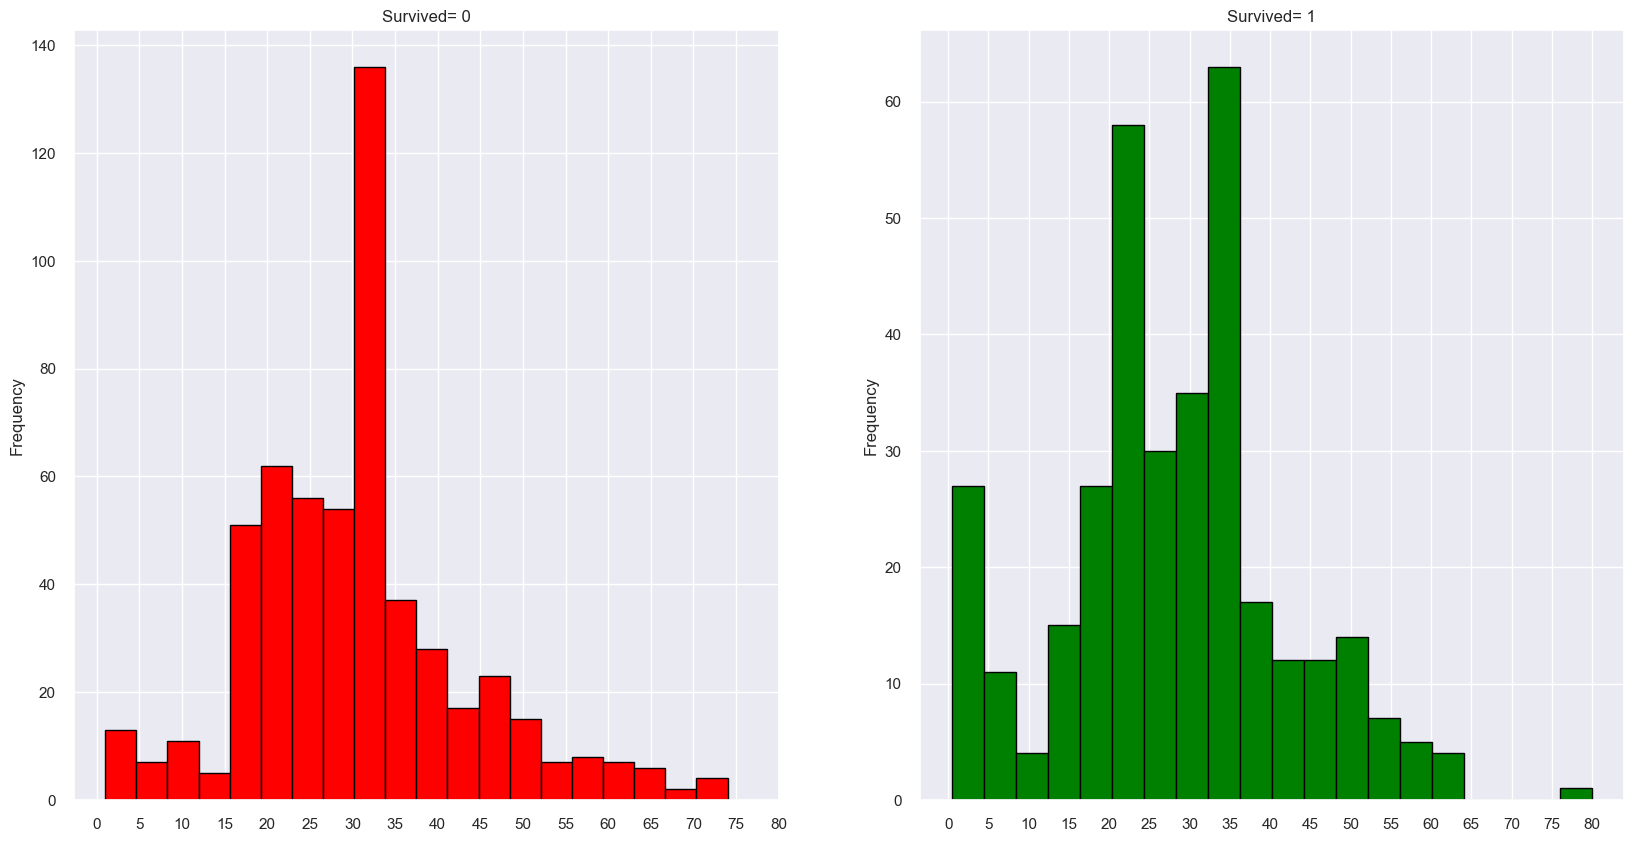

In [120]:
f,ax=plt.subplots(1,2,figsize=(20,10))

# 첫번째 차트 : 생존하지 못한 사람들의 나이 히스토그램
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

# 두번째 차트 : 생존한 사람들의 나이 히스토그램
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

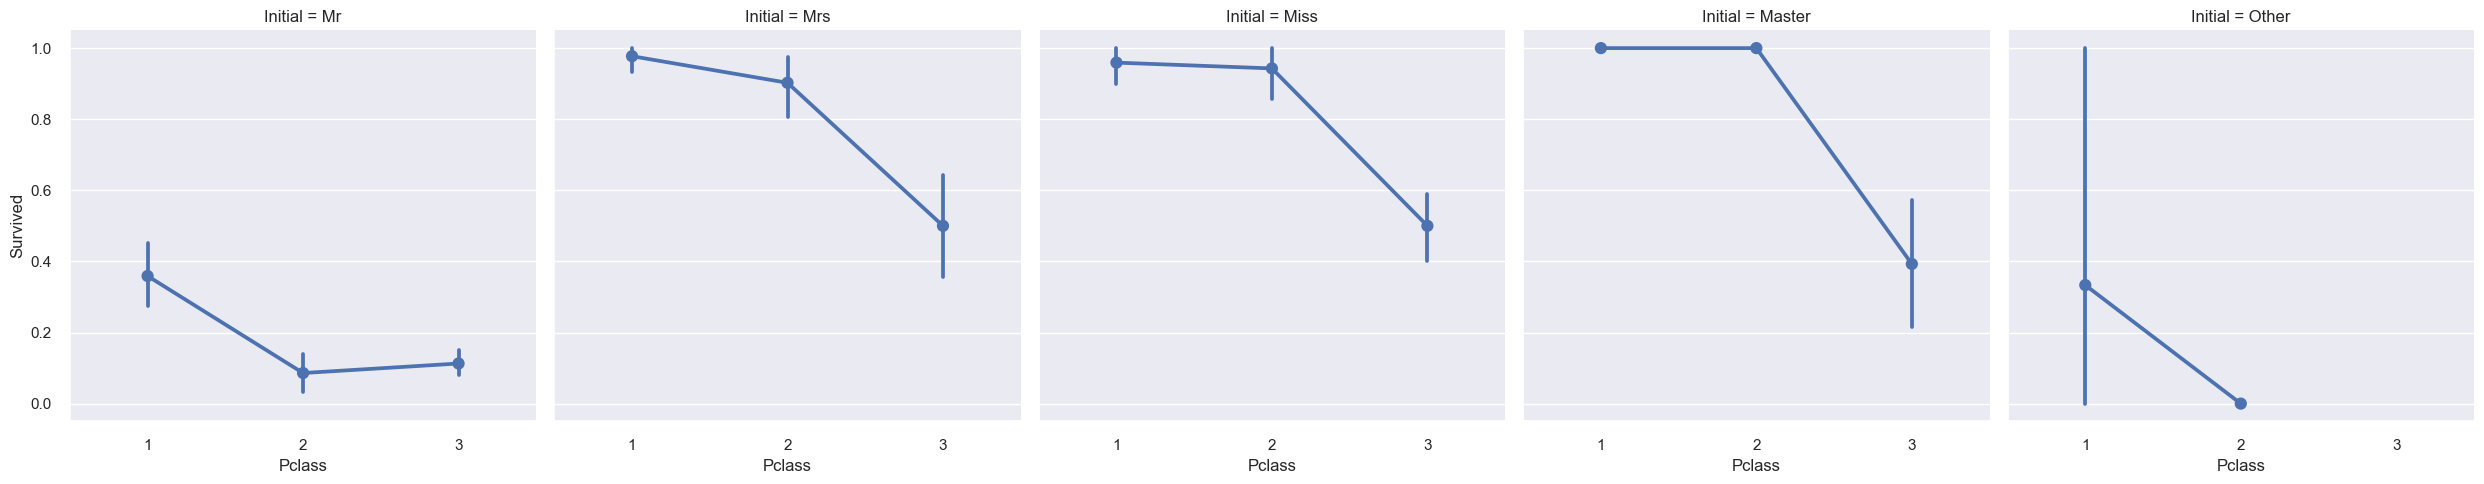

In [121]:
sns.catplot(x = 'Pclass', y = 'Survived', col = 'Initial', data = df_train, kind = 'point')
plt.show()

유아들(나이가 5세 미만)이 많이 구조되었고 가장 나이가 많은 80세 승객도 생존한 것으로 보인다. 최대 사망자 수는 30-40세 연령대에서 발생했다.

### 상관계수

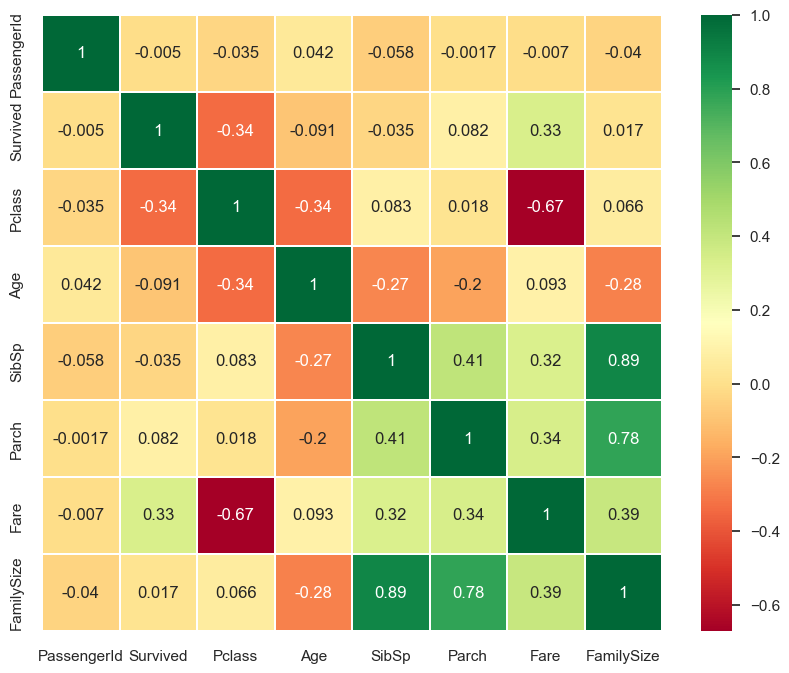

In [127]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

히트맵은 범주형 변수들끼리만 그릴 수 있기 때문에 위와 같이 그려진다. 특별하게 상관관계에 있는 것들은 보이진않지만 'SibSp'과 'Parch' 그리고 'FamilySize'는 서로 연관이 있을 수도 있으니 모델을 생성할 때 유의해야할 것 같다.

## Feature Engineering and Data Cleaning

### Age

'Age' 필드는 연속형 변수로서 머신러닝 모델에 돌리기엔 부적합하다. 따라서 이를 범주형 변수로 바꿔줄 필요가 있다. 

최소 나이인 0세부터 최대 나이인 80세 사이를 80/5 = 16 범위로 나누어 연령대를 구분해주자.

In [128]:
df_train['Age_band'] = 0

df_train.loc[df_train['Age'] <= 16, 'Age_band'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 32), 'Age_band'] = 1
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <= 48), 'Age_band'] = 2
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <= 64), 'Age_band'] = 3
df_train.loc[df_train['Age'] > 64, 'Age_band'] = 4

df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,2


In [130]:
df_train['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

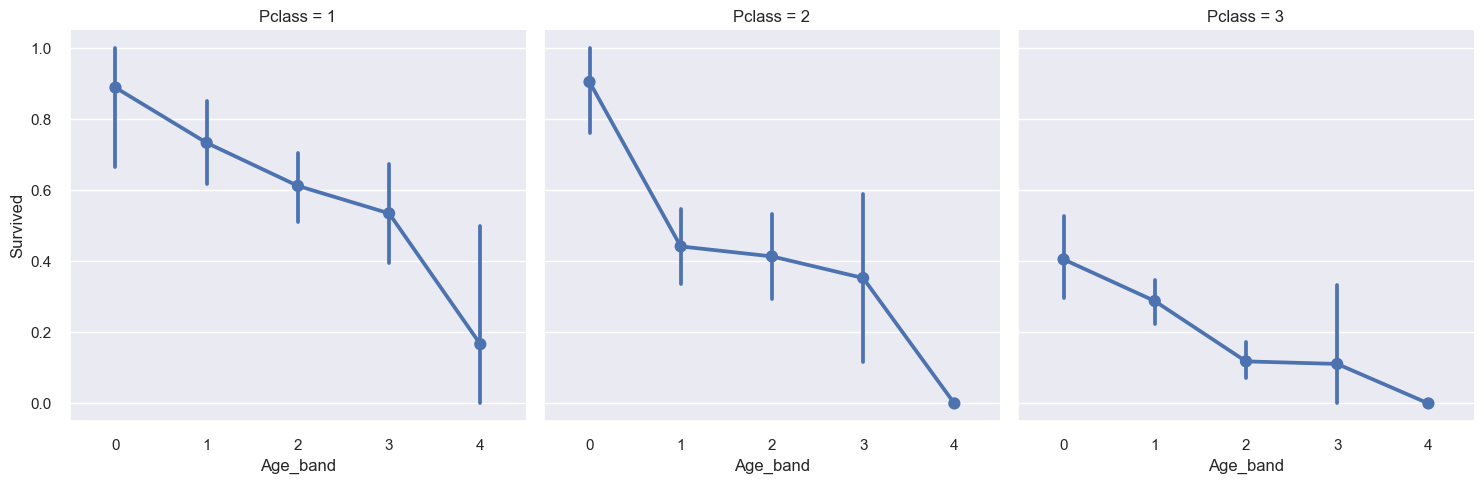

In [131]:
sns.catplot(x = 'Age_band', y = 'Survived', data = df_train, col = 'Pclass', kind = 'point')
plt.show()

3등실 승객일수록 생존율이 나이와 상관없이 낮은 것을 볼 수 있다..

### FamilySize and Alone

앞서 FamilySize 필드를 만들었었다. 이를 통해 혼자 온 사람인지 아닌지에 대한 'Alone'필드도 만들어보자.

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Initial      891 non-null    object 
 14  Age_band     891 non-null    int64  
 15  Alone        891 non-null    int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


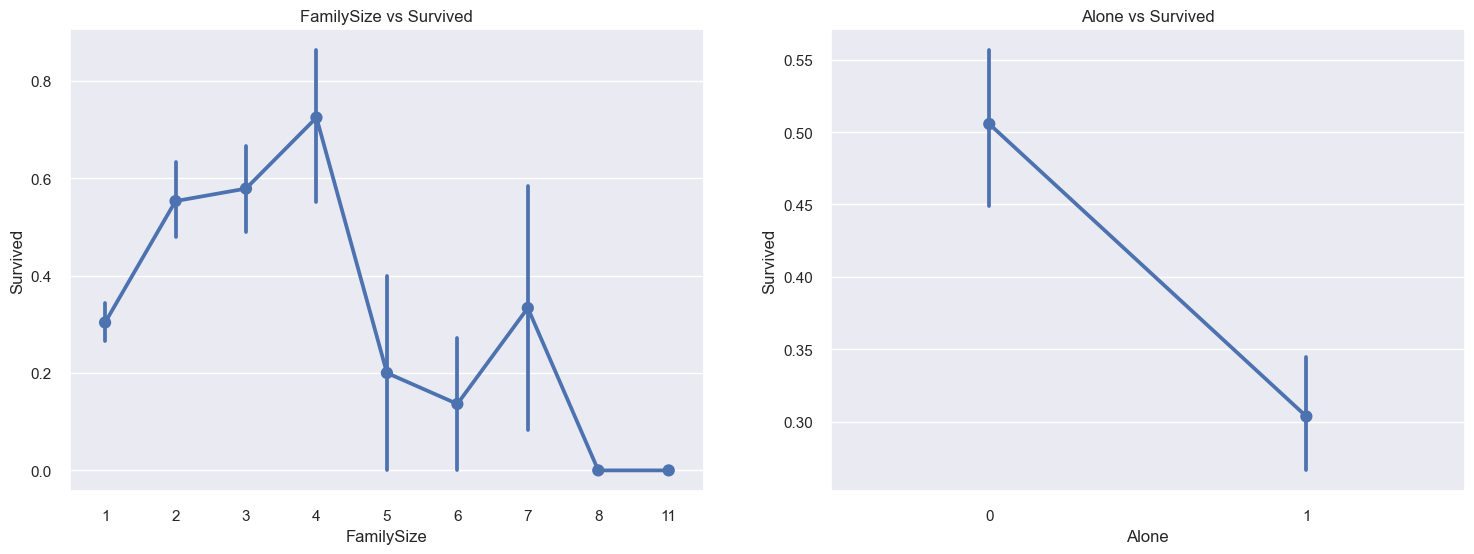

In [141]:
df_train['Alone']=0
df_train.loc[df_train.FamilySize == 1,'Alone'] = 1 #Alone

f,ax=plt.subplots(1,2,figsize=(18,6))

# 첫번째 차트 : 가족수 별 생존율
sns.pointplot(x = 'FamilySize', y = 'Survived',data=df_train, ax=ax[0])
ax[0].set_title('FamilySize vs Survived')

# 두번째 차트 : 혼자 탑승했는가의 유무에 따른 생존율
sns.pointplot(x = 'Alone', y = 'Survived',data=df_train, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

# 이때 pointplot을 catplot으로 하고 kind = 'point' 옵션을 주었더니
# catplot 호출 시 새로운 figure와 axes가 생성되서 차트가 따로 출력되어
# 위와 같이 pointplot을 이용해주었다.

앞서도 보았지만, 가족수가 5 이상인 승객들은 생존율이 낮았고 혼자 탑승한 승객들의 생존율은 가족과 함께 탑승한 승객들보다 현저히 낮은 것을 볼 수 있다.

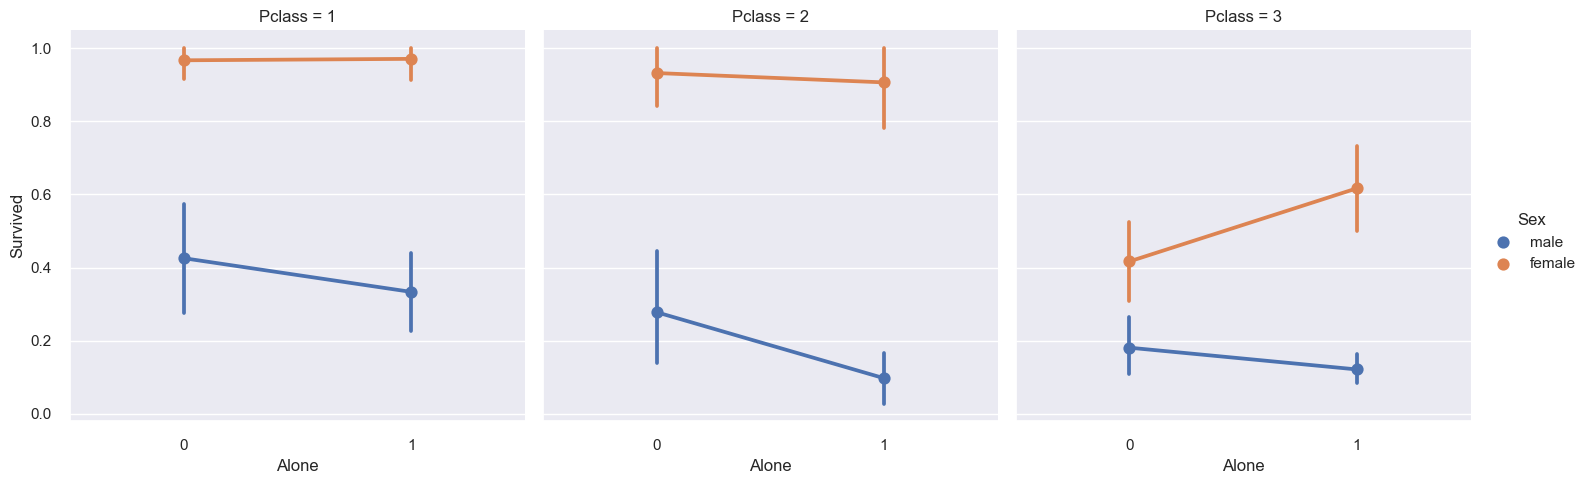

In [143]:
sns.catplot(x = 'Alone',y = 'Survived',data=df_train,
            kind = 'point', hue='Sex',col='Pclass')
plt.show()

### Fare range

'Fare' 컬럼 또한 연속형 변수이므로 범위를 나눠 범주형 변수로 만들어주자.

In [145]:
df_train['Fare'].max()

6.238967387173662

In [144]:
# pd.qcut(데이터, 원하는 구간 개수)

df_train['Fare_Range'] = pd.qcut(df_train['Fare'], 4)
df_train.groupby(['Fare_Range'])['Survived'].mean()

Fare_Range
(-0.001, 2.068]    0.197309
(2.068, 2.671]     0.303571
(2.671, 3.434]     0.454955
(3.434, 6.239]     0.581081
Name: Survived, dtype: float64

요금이 올라갈수록 생존율 또한 증가하고 있다. 앞서 'Fare' 컬럼에 log를 취해주어 비대칭을 맞춰주어 링크 자료와 값은 다르지만 똑같이 범주형 변수로 만들어주겠다.

In [146]:
df_train['Fare_cat']=0
df_train.loc[df_train['Fare']<=2.068,'Fare_cat']=0
df_train.loc[(df_train['Fare']>2.068)&(df_train['Fare']<=2.671),'Fare_cat']=1
df_train.loc[(df_train['Fare']>2.671)&(df_train['Fare']<=3.434),'Fare_cat']=2
df_train.loc[(df_train['Fare']>3.434)&(df_train['Fare']<=6.239),'Fare_cat']=3

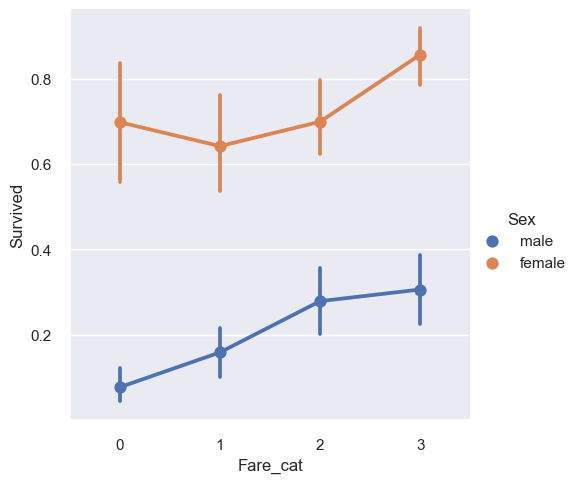

In [148]:
sns.catplot(x = 'Fare_cat', y = 'Survived', data = df_train, kind = 'point', hue = 'Sex')
plt.show()

### Convert String -> Numeric

이제 숫자형 변수들을 모두 문자형 변수로 만들어주자.

In [149]:
df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
df_train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int64   
 12  FamilySize   891 non-null    int64   
 13  Initial      891 non-null    int64   
 14  Age_band     891 non-null    int64   
 15  Alone        891 non-null    int64   
 16  Fare_Range   891 non-null    category
 17  Fare_cat     891 non-null    int64   
dtypes: category(1), float64(2), in

### Drop unneeded features

 모델 생성에 필요없는 컬럼들은 버려주자.

 우리에게 필요없는 컬럼들은 아래와 같다.

 Name(범주값으로 변환 불가), Age(Age_band 컬럼 이용), Ticket(범주값으로 변환 불가), Fare(Fare_cat 컬럼 이용), Cabin(결측값이 많음), Fare_Range(Fare_cat 컬럼 이용), PassengerId(범주값으로 변환 불가)

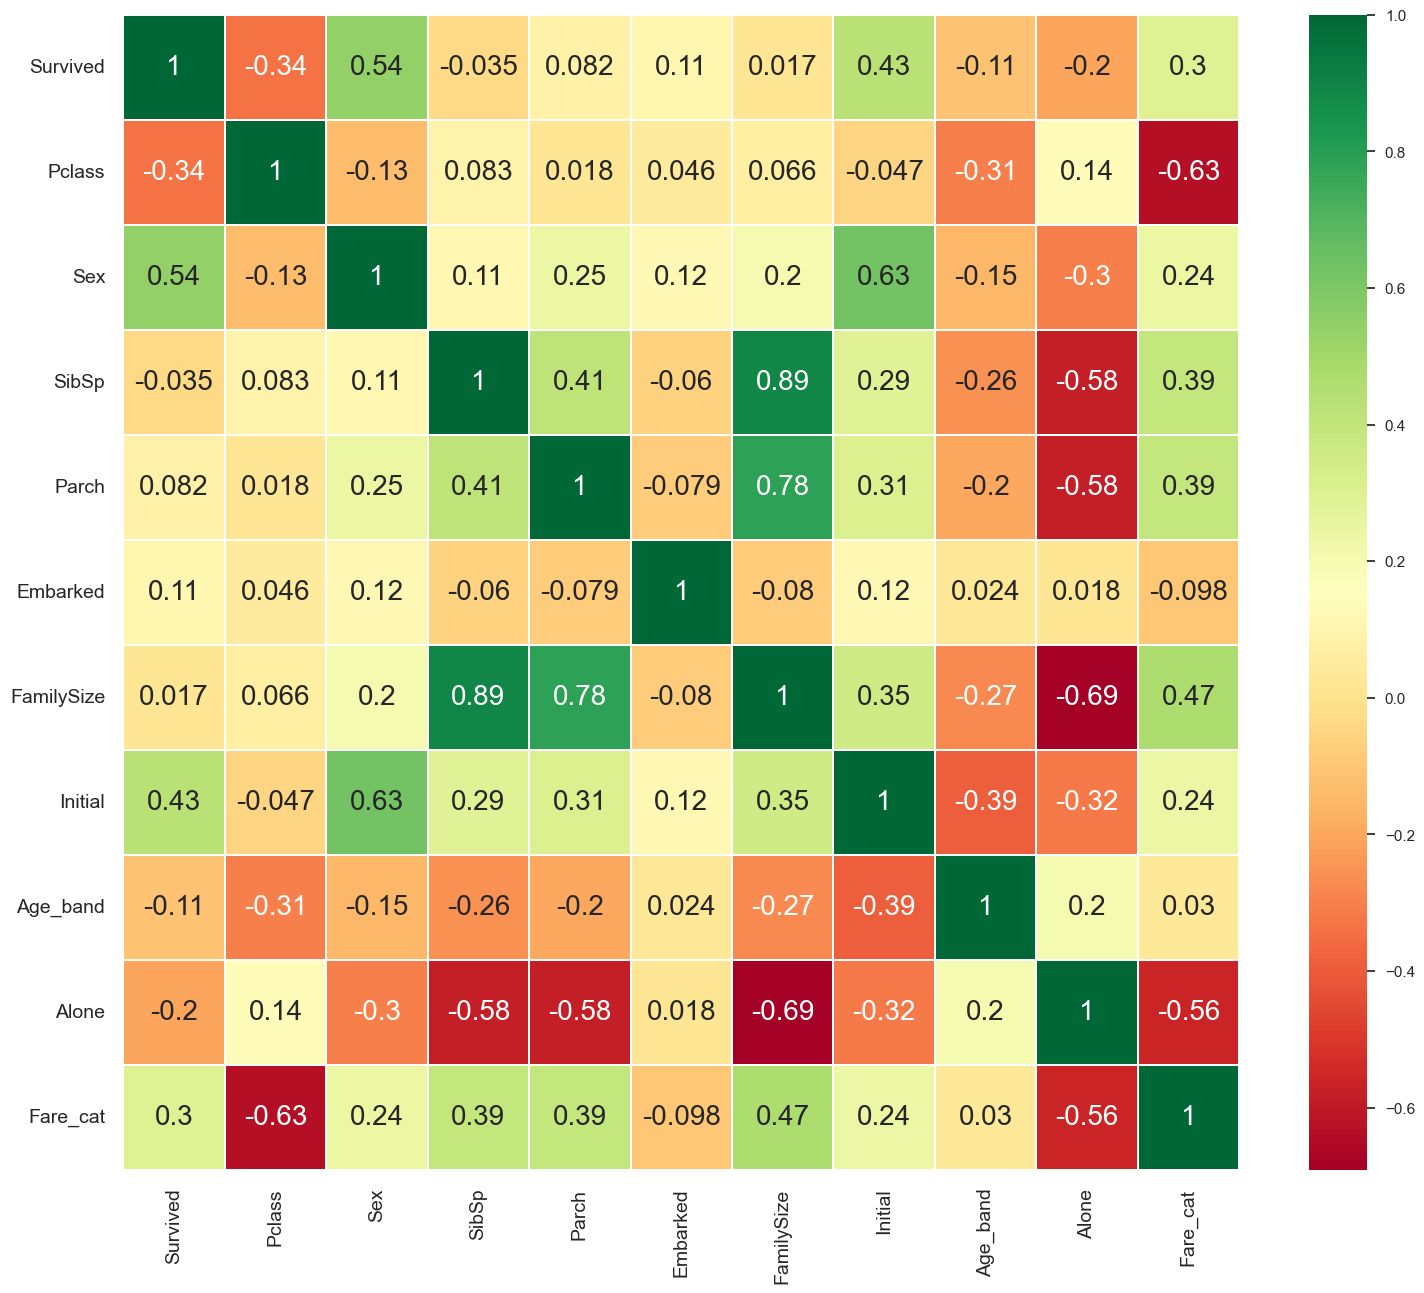

In [151]:
df_train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

SibSp와 Family_Size, Parch와 FamilySize는 서로 영향을 끼치고 Alone 컬럼은 이들로 생성된 컬럼이므로 상관관계가 있을 수 밖에 없다.